## Question 1.1

Given the signal
$$
x(n)=\left\{\begin{array}{l}
2 n+4,-4 \leq n \leq-1 \\
2 n, 0 \leq n \leq 4 \\
0, \text { others }
\end{array}\right.
$$
draw the waveform of the $x(n)$, $x_{1}(n) = 2x(n-2)$ and $x_{2}(n) = 3x(3-n)$

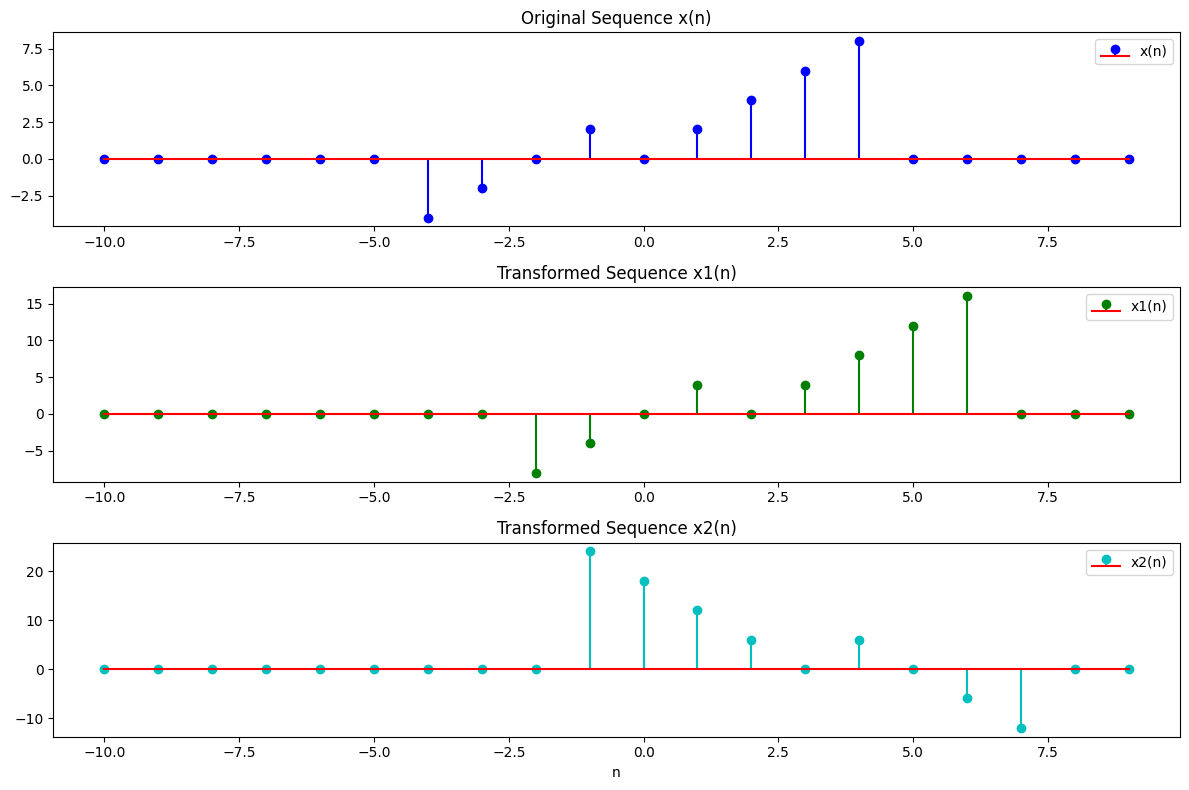

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original sequence x(n)
def x(n):
    if -4 <= n <= -1:
        return 2 * n + 4
    elif 0 <= n <= 4:
        return 2 * n
    else:
        return 0

# Define the sequence x1(n)
def x1(n):
    return 2 * x(n - 2)

# Define the sequence x2(n)
def x2(n):
    return 3 * x(3 - n)

# Generate the sequences
n_values = np.arange(-10, 10)  # Adjust range as needed
x_values = [x(n) for n in n_values]
x1_values = [x1(n) for n in n_values]
x2_values = [x2(n) for n in n_values]

# Plotting the results
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.stem(n_values, x_values, linefmt='b-', markerfmt='bo', basefmt='r-', label='x(n)')
plt.title('Original Sequence x(n)')
plt.legend()

plt.subplot(3, 1, 2)
plt.stem(n_values, x1_values, linefmt='g-', markerfmt='go', basefmt='r-', label='x1(n)')
plt.title('Transformed Sequence x1(n)')
plt.legend()

plt.subplot(3, 1, 3)
plt.stem(n_values, x2_values, linefmt='c-', markerfmt='co', basefmt='r-', label='x2(n)')
plt.title('Transformed Sequence x2(n)')
plt.legend()

plt.xlabel('n')
plt.tight_layout()
plt.show()

The image contains a problem that appears to be related to digital signal processing. The problem involves defining two sequences $x(n)$ and $x_2(n)$, where $x_2(n)$ is a shifted version of $x(n)$ and calculating values or performing some operations with these sequences.

**Definition of Sequences**:

- **$x(n)$** is defined as:
  - $2n + 4$ for $-4 \leq n \leq -1$
  - $2n$ for $0 \leq n \leq 4$
  - $0$ otherwise

- **$x_2(n)$** is a shifted version of $x(n)$ by two places to the right:
  - $x_2(n) = x(n - 2)$

## Question 1.2

Given a linear time-invariant system with the unit impulse response $h(n) = u(n)-u(n-4)$, find the zero state response with the input sequence $x(n)=\frac{\sin (0.3 \pi n)}{n[u(n)-u(n-10)]}$.

C:\Users\24365\AppData\Local\Temp\ipykernel_56724\3264158275.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sin(0.3 * np.pi * n) / (n * (u(n) - u(n - 10)))
C:\Users\24365\AppData\Local\Temp\ipykernel_56724\3264158275.py:24: RuntimeWarning: invalid value encountered in scalar add
  result += x(n - k)


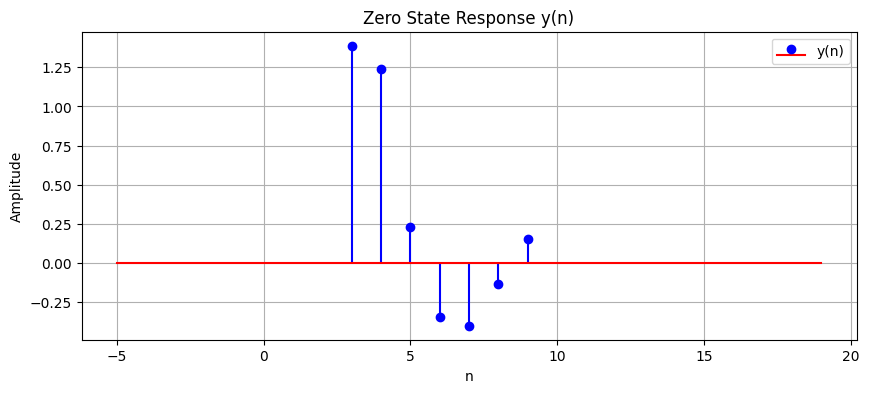

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the unit step function
def u(n):
    return np.heaviside(n, 1)

# Define the impulse response h(n)
def h(n):
    return u(n) - u(n - 4)

# Define the input sequence x(n)
def x(n):
    # Handle division by zero for n = 0
    if n == 0:
        return 0
    else:
        return np.sin(0.3 * np.pi * n) / (n * (u(n) - u(n - 10)))

# Convolution of x(n) and h(n)
def y(n):
    result = 0
    for k in range(4):  # Since h(n) is nonzero only for n = 0 to 3
        result += x(n - k)
    return result

# Generate sequences for plotting
n_values = np.arange(-5, 20)  # Adjust range to see the full effect
y_values = [y(n) for n in n_values]

# Plotting the result
plt.figure(figsize=(10, 4))
plt.stem(n_values, y_values, linefmt='b-', markerfmt='bo', basefmt='r-', label='y(n)')
plt.title('Zero State Response y(n)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

The zero-state response of a linear time-invariant (LTI) system when subjected to an input sequence can be found by convolving the input sequence $x(n)$ with the system's impulse response $h(n)$. The convolution sum for a discrete-time system is given by:

$$y(n) = (x * h)(n) = \sum_{k=-\infty}^{\infty} x(k) h(n-k)$$

Given:
- $h(n) = u(n) - u(n-4)$
- $x(n) = \frac{\sin(0.3 \pi n)}{n} [u(n) - u(n-10)]$

**Convolution**

The impulse response $h(n)$ is nonzero from $n = 0$ to $n = 3$, and the input sequence $x(n)$ is nonzero from $n = 0$ to $n = 9$. Therefore, the convolution can be simplified to:

$$y(n) = \sum_{k=0}^3 x(n-k)$$

## Question 1.3

Assume that an analog signal $x_{a}(t) = e^{-1000|t|}$

1. Draw the time-domain waveform of the $x_{a}(t)$ and the amplitude frequency specification curve.
2. If we sample the signal $x_{a}(t)$ using two different sampling frequencies $f_{s1} = 5000 Hz$ and $f_{s2} = 1000 Hz$, draw the spectrum of the sampled signal.

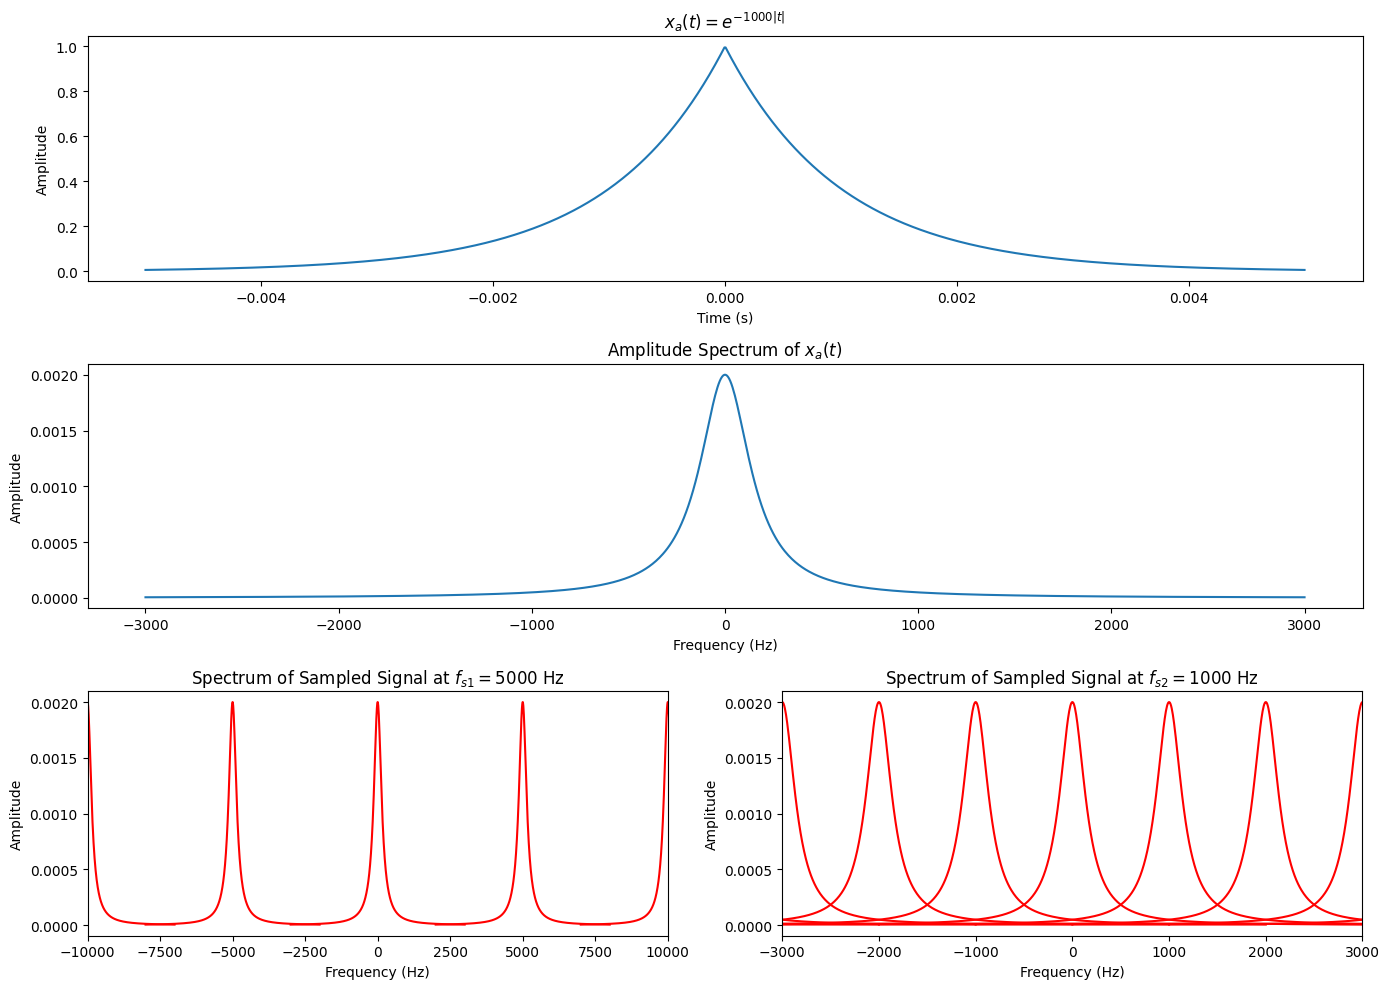

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Time-domain waveform
t = np.linspace(-0.005, 0.005, 1000)
xa = np.exp(-1000 * np.abs(t))

# Frequency-domain specification (Fourier Transform)
f = np.linspace(-3000, 3000, 1000)
Xf = 2000 / (1000**2 + (2 * np.pi * f)**2)

# Sampling frequencies
fs1 = 5000
fs2 = 1000

# Plotting
plt.figure(figsize=(14, 10))

# Time-domain plot
plt.subplot(3, 1, 1)
plt.plot(t, xa)
plt.title('$x_a(t) = e^{-1000|t|}$')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Frequency-domain plot
plt.subplot(3, 1, 2)
plt.plot(f, Xf)
plt.title('Amplitude Spectrum of $x_a(t)$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

# Spectrum of sampled signal
plt.subplot(3, 2, 5)
f1 = np.arange(-15000, 15000, fs1)
for f_shift in f1:
    plt.plot(f + f_shift, Xf, 'r')
plt.title('Spectrum of Sampled Signal at $f_{s1} = 5000$ Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-10000, 10000)

plt.subplot(3, 2, 6)
f2 = np.arange(-5000, 5000, fs2)
for f_shift in f2:
    plt.plot(f + f_shift, Xf, 'r')
plt.title('Spectrum of Sampled Signal at $f_{s2} = 1000$ Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(-3000, 3000)

plt.tight_layout()
plt.show()

Let's break down the tasks step by step:

1. Drawing the time-domain waveform of $x_a(t) = e^{-1000|t|}$

   The given signal is an exponential decay function, symmetric about $t = 0$. The amplitude decreases as the absolute value of time increases.

2. Drawing the amplitude frequency specification curve

   The Fourier Transform of $x_a(t) = e^{-1000|t|}$ can be computed because it is a known transform of an exponentially decaying function:
   $$X(f) = \frac{2000}{1000^2 + (2\pi f)^2}$$
   This results in a Lorentzian or Cauchy distribution centered at $f = 0$.

3. Spectrum of the sampled signal at different sampling frequencies

   Sampling a signal results in periodic repetition of its spectrum at intervals equal to the sampling frequency, which leads to potential aliasing if the sampling theorem is not satisfied.

   **For $f_{s1} = 5000 \text{ Hz}$**:
   The Nyquist frequency is $2500 \text{ Hz}$. Since the significant portion of the signal's energy (main lobe of the Lorentzian) is within $\pm 2500 \text{ Hz}$, this sampling rate should sufficiently capture the signal without aliasing.

   **For $f_{s2} = 1000 \text{ Hz}$**:
   The Nyquist frequency is $500 \text{ Hz}$. The signal spectrum extends beyond $500 \text{ Hz}$, leading to aliasing where higher frequency components fold back into lower frequencies.

## Question 1.4

Given a linear time-invariant casual system, describe with the following difference equation:
$$y(n) = y(n-1) + y(n-2) + x(n-1)$$

1. Solve the system function of the system, and plot the pole-zero distribution diagram.
2. Draw the impulse response of the system.
3. Draw the frequency response and the phase response of the system, and analyze the frequency selection characteristics of the system.

C:\Users\24365\AppData\Roaming\Python\Python312\site-packages\scipy\signal\_filter_design.py:1109: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


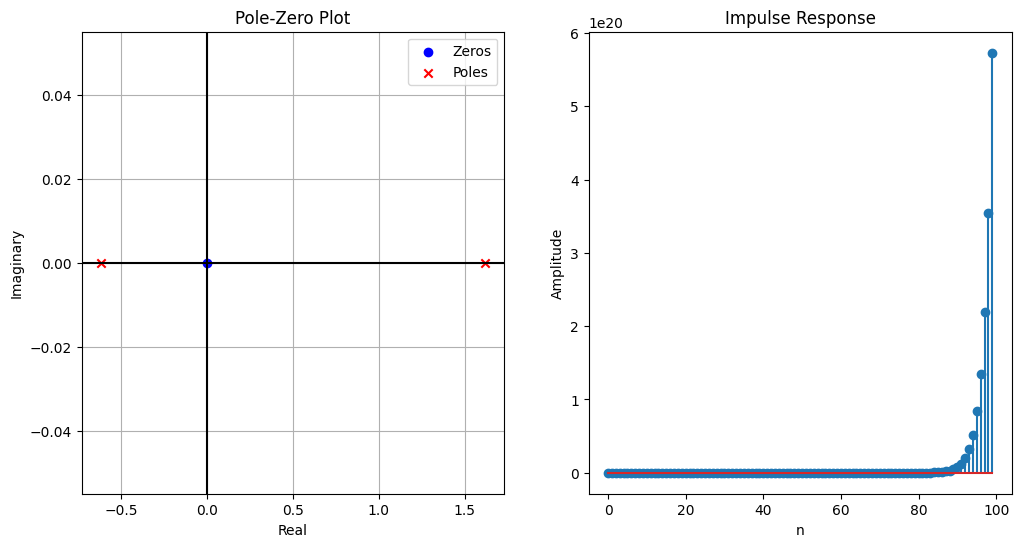

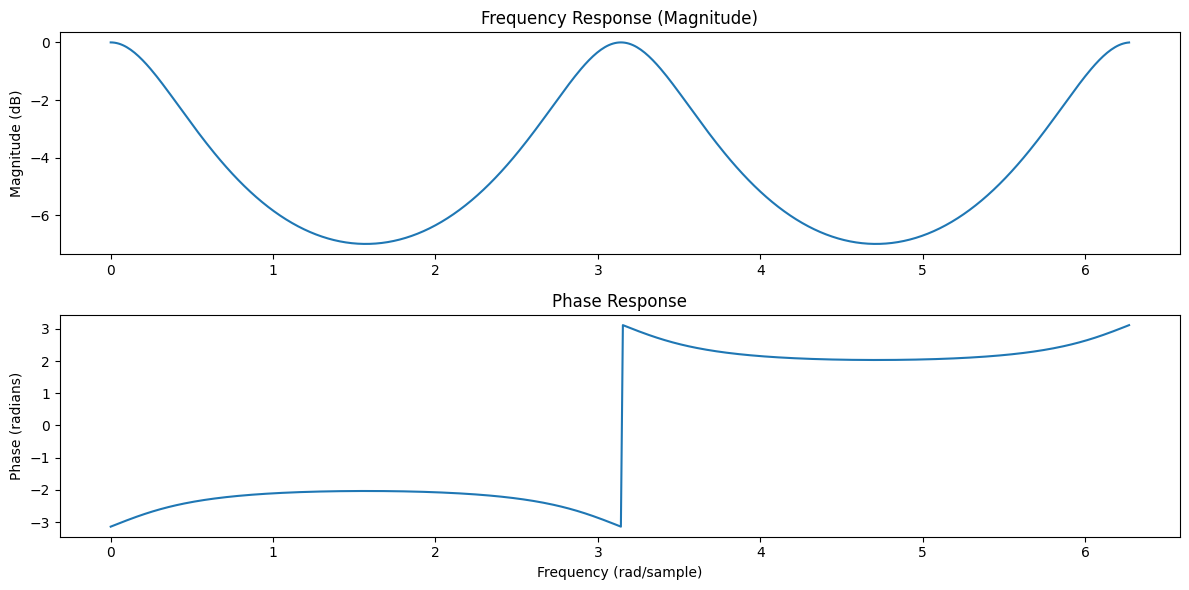

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, freqz, dlti, dstep, tf2zpk

# Define system using coefficients
b = [0, 1, 0]  # x(n-1) -> [0, 1, 0]
a = [1, -1, -1]  # 1 - y(n-1) - y(n-2) -> [1, -1, -1]

# Create Transfer Function
system = TransferFunction(b, a, dt=1)

# Compute poles and zeros
zeros, poles, _ = tf2zpk(b, a)

# Pole-Zero Plot
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Poles')
plt.title("Pole-Zero Plot")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.legend()

# Impulse Response
t, h = dstep(system)
plt.subplot(122)
plt.stem(t, np.squeeze(h))
plt.title("Impulse Response")
plt.xlabel("n")
plt.ylabel("Amplitude")

# Frequency Response
w, H = freqz(b, a, whole=True)
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(w, 20 * np.log10(abs(H)))
plt.title("Frequency Response (Magnitude)")
plt.ylabel("Magnitude (dB)")

plt.subplot(212)
plt.plot(w, np.angle(H))
plt.title("Phase Response")
plt.ylabel("Phase (radians)")
plt.xlabel("Frequency (rad/sample)")

plt.tight_layout()
plt.show()

Let's solve the given tasks step-by-step for the linear time-invariant (LTI) causal system described by the difference equation:

$$y(n) = y(n-1) + y(n-2) + x(n-1)$$

1. Solving the System Function (Transfer Function)

   To derive the system function $H(z)$, which is the Z-transform of the impulse response $h(n)$, we first take the Z-transform of both sides of the difference equation assuming initial rest conditions (i.e., $y(n) = 0$ for $n < 0$):

   $$Y(z) = z^{-1} Y(z) + z^{-2} Y(z) + z^{-1} X(z)$$

   Rearrange this to express $Y(z)$ in terms of $X(z)$:

   $$Y(z)(1 - z^{-1} - z^{-2}) = z^{-1} X(z)$$

   $$H(z) = \frac{Y(z)}{X(z)} = \frac{z^{-1}}{1 - z^{-1} - z^{-2}} = \frac{z}{z^2 - z - 1}$$

   The poles of the system are the solutions to the equation $z^2 - z - 1 = 0$. We can use the quadratic formula to find these:

   $$z = \frac{-(-1) \pm \sqrt{(-1)^2 - 4 \times 1 \times (-1)}}{2 \times 1} = \frac{1 \pm \sqrt{5}}{2}$$

2. Pole-Zero Distribution Diagram

   Let's plot this. We see that $H(z)$ has zeros at $z = 0$ and poles at $z = \frac{1 \pm \sqrt{5}}{2}$.

3. Impulse Response $h(n)$

   Given that the system is causal and LTI, the impulse response $h(n)$ corresponds to the inverse Z-transform of $H(z)$, which can be solved using partial fraction expansion and standard Z-transform pairs.

4. Frequency and Phase Response

   The frequency response $H(e^{j\omega})$ is obtained by evaluating $H(z)$ on the unit circle $z = e^{j\omega}$. The phase response is the argument of $H(e^{j\omega})$.